In [1]:
import numpy as np
import pandas as pd
import time
import datetime
import ccxt
import matplotlib.pyplot as plt
import hdbscan
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
def get_binance_data(symbol, interval, end_date):
    btc_ohlcv = binance.fetch_ohlcv(symbol, interval, limit=1000, params={'endTime':end_date})
    df = pd.DataFrame(btc_ohlcv, columns=['datetime', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
    df.set_index('datetime', inplace=True)
    return df

In [3]:
now = datetime.datetime.utcnow() + datetime.timedelta(hours=9)
symbol = 'BTCUSDT'
interval = '1h'
binance = ccxt.binance()

In [4]:
dfs = []
df = get_binance_data(symbol, interval, int(datetime.datetime.timestamp(now))*1000)
dfs.append(df)

print(df)

                         open      high       low     close      volume
datetime                                                               
2023-08-14 15:00:00  29533.99  29672.00  29475.67  29599.99  2639.23932
2023-08-14 16:00:00  29600.00  29695.32  29599.99  29653.99  1535.29311
2023-08-14 17:00:00  29653.99  29671.96  29480.10  29487.28  1595.00355
2023-08-14 18:00:00  29487.29  29490.00  29257.00  29330.01  3074.89271
2023-08-14 19:00:00  29330.01  29392.42  29322.00  29360.54   655.09177
...                       ...       ...       ...       ...         ...
2023-09-25 02:00:00  26164.00  26252.80  26156.97  26207.39   882.55101
2023-09-25 03:00:00  26207.39  26238.85  26154.95  26157.45   601.68644
2023-09-25 04:00:00  26157.44  26195.44  26112.88  26149.06   602.04205
2023-09-25 05:00:00  26149.07  26151.50  26077.00  26113.81   723.75469
2023-09-25 06:00:00  26113.81  26172.08  26040.12  26144.58   998.22672

[1000 rows x 5 columns]


In [5]:
try:
    while True:
        df = get_binance_data(symbol, interval, int(datetime.datetime.timestamp(df.index[0]))*1000)
        dfs.append(df)
        time.sleep(0.2)
except:
    pass

In [6]:
df = pd.concat(dfs)
df = df.sort_index()

In [7]:
scaler = RobustScaler()
df_scale =  pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

print(df_scale)

           open      high       low     close    volume
0     -0.370345 -0.372954 -0.365167 -0.368260 -0.696631
1     -0.368176 -0.372266 -0.363786 -0.367962 -0.706607
2     -0.367192 -0.371501 -0.362959 -0.367549 -0.713275
3     -0.367819 -0.371294 -0.363968 -0.366374 -0.714436
4     -0.367054 -0.370022 -0.361858 -0.365884 -0.715881
...         ...       ...       ...       ...       ...
52974  0.633127  0.628293  0.641324  0.635055 -0.348624
52975  0.635115  0.627656  0.641231  0.632766 -0.465630
52976  0.632827  0.625675  0.639297  0.632382 -0.465482
52977  0.632443  0.623670  0.637648  0.630767 -0.414777
52978  0.630828  0.624609  0.635952  0.632177 -0.300435

[52979 rows x 5 columns]


In [11]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000)
df["dbscan_cluster"] = clusterer.fit_predict(np.array(df_scale['close']).reshape(-1, 1))
print(len(df["dbscan_cluster"].unique()))

print(df)

16
                         open      high       low     close      volume  \
datetime                                                                  
2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83   47.181009   
2017-08-17 05:00:00   4308.83   4328.69   4291.37   4315.32   23.234916   
2017-08-17 06:00:00   4330.29   4345.45   4309.37   4324.35    7.229691   
2017-08-17 07:00:00   4316.62   4349.99   4287.41   4349.99    4.443249   
2017-08-17 08:00:00   4333.32   4377.85   4333.32   4360.69    0.972807   
...                       ...       ...       ...       ...         ...   
2023-09-25 02:00:00  26164.00  26252.80  26156.97  26207.39  882.551010   
2023-09-25 03:00:00  26207.39  26238.85  26154.95  26157.45  601.686440   
2023-09-25 04:00:00  26157.44  26195.44  26112.88  26149.06  602.042050   
2023-09-25 05:00:00  26149.07  26151.50  26077.00  26113.81  723.754690   
2023-09-25 06:00:00  26113.81  26172.08  26040.12  26144.58  998.226720   

                     

31392.79
24998.78
23897.84
21917.77
21913.69
18432.14
17871.78
15722.98


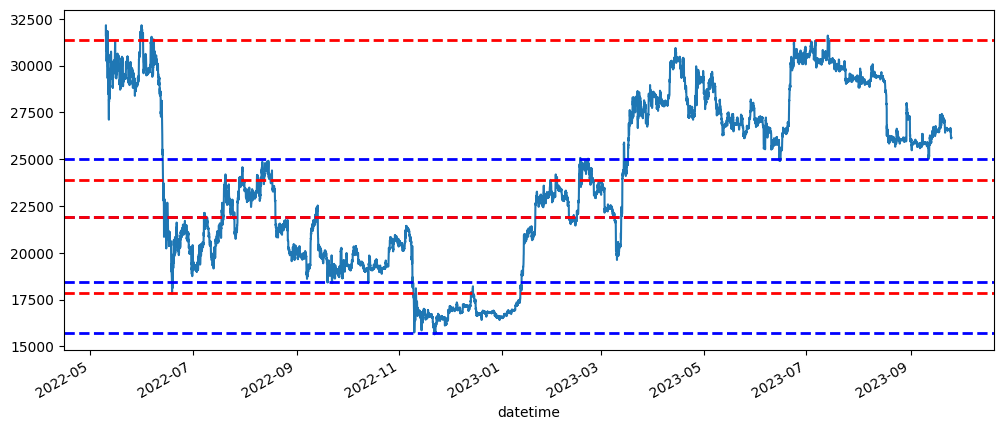

In [9]:
temp = df[41000:]
temp['close'].plot(figsize=(12, 5))
for n in temp["dbscan_cluster"].unique():
    if n != -1:
        plt.axhline(temp[temp['dbscan_cluster']==n]['close'].max(), color='red', linestyle='--', linewidth=2)
        print(temp[temp['dbscan_cluster']==n]['close'].max())
        plt.axhline(temp[temp['dbscan_cluster']==n]['close'].min(), color='blue', linestyle='--', linewidth=2)
        print(temp[temp['dbscan_cluster']==n]['close'].min())

In [10]:
print(temp["dbscan_cluster"].unique())

[-1  3  6  7  4]
